In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import reshape
import pylab

This notebook has three parts:

**Part 1: Load and plot projected water and sediment discharge through 2100**
- Outputs from each climate model are imported into the notebook
- Dataframes are cleaned up
- Data are reshaped to obtain mean annual water and sediment discharge
- Data are plotted 

**Part 2: Calculate average water and sediment discharge and annual sediment discharge for each time period**
- Summary statistic csv files are imported into the notebook
- Averages for water discharge, SSC, sediment discharge, and annual sediment discharge are taken over each climate model to get one value per time period.

**Part 3: Calculate annual present-day Qs using new rating curve**
- A rating curve generated using recent water discharge and SSC data is applied to the HydroTrend Qw data
- Annual sediment loads are obtained for each climate model for the year 2019

# Part 1: Load and plot projected water and sediment discharge through 2100

## Import ASCII Data

### GFDL-ESM2M

In [2]:
gfdl_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/GFDL-ESM2M/ASCII_data.csv')

gfdl = pd.DataFrame(gfdl_csv)
gfdl.head()

,Unnamed: 0,index,Qw(m3/s),index.1,Qs(kg/s),index.2,Qb(kg/s),index.3,CsBin 1,CsBin2,CsBin3,CsBin4,index.4,vel(m/s),wid(m),dep(m),index.5,temp(deg.C),prec(m)
0,0,1,4020.0,1,5.223,1,186.701,1,0.0,0.0,0.0,0.0,1,1.415,1708.06,1.663,1,23.04717,0.00000
1,1,2,4020.0,2,2.353,2,186.701,2,0.0,0.0,0.0,0.0,2,1.415,1708.06,1.663,2,22.66469,0.00000
2,2,3,4020.0,3,3.506,3,186.701,3,0.0,0.0,0.0,0.0,3,1.415,1708.06,1.663,3,21.76623,0.00023
3,3,4,4020.0,4,3.761,4,186.701,4,0.0,0.0,0.0,0.0,4,1.415,1708.06,1.663,4,19.73462,0.00061
4,4,5,4020.0,5,4.331,5,186.701,5,0.0,0.0,0.0,0.0,5,1.415,1708.06,1.663,5,21.02868,0.00002


In [3]:
gfdl.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,4020.000,5.223,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,23.04717,0.00000
1,4020.000,2.353,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,22.66469,0.00000
2,4020.000,3.506,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,21.76623,0.00023
3,4020.000,3.761,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,19.73462,0.00061
4,4020.000,4.331,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,21.02868,0.00002
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,4020.482,2.294,186.724,0.0,0.0,0.0,0.0,1.415,1708.113,1.663,20.77162,0.00005
32846,4020.328,2.879,186.716,0.0,0.0,0.0,0.0,1.415,1708.096,1.663,21.46326,0.00002
32847,4020.247,3.330,186.713,0.0,0.0,0.0,0.0,1.415,1708.087,1.663,21.64191,0.00000
32848,4020.177,2.573,186.709,0.0,0.0,0.0,0.0,1.415,1708.079,1.663,22.88642,0.00000


### HadGEM2

In [4]:
hadgem_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/HadGEM2/ASCII_data.csv')
hadgem = pd.DataFrame(hadgem_csv)
hadgem.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,4020.0,11.994,186.701,0.001,0.001,0.001,0.001,1.415,1708.06,1.663,19.84373,0.00046
1,4020.0,5.052,186.701,0.000,0.000,0.000,0.000,1.415,1708.06,1.663,19.36086,0.00025
2,4020.0,7.784,186.701,0.000,0.000,0.000,0.001,1.415,1708.06,1.663,19.66644,0.00013
3,4020.0,8.400,186.701,0.000,0.000,0.001,0.001,1.415,1708.06,1.663,19.74644,0.00011
4,4020.0,9.788,186.701,0.000,0.000,0.001,0.001,1.415,1708.06,1.663,20.52384,0.00003
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,4020.0,3.662,186.701,0.000,0.000,0.000,0.000,1.415,1708.06,1.663,22.60348,0.00003
32846,4020.0,3.037,186.701,0.000,0.000,0.000,0.000,1.415,1708.06,1.663,22.88877,0.00001
32847,4020.0,2.102,186.701,0.000,0.000,0.000,0.000,1.415,1708.06,1.663,23.17914,0.00002
32848,4020.0,2.082,186.701,0.000,0.000,0.000,0.000,1.415,1708.06,1.663,23.65545,0.00001


### IPSL_CM5A

In [5]:
ipsl_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/IPSL_CM5A/ASCII_data.csv')
ipsl = pd.DataFrame(ipsl_csv)
ipsl.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,4020.000,1.645,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,24.05193,0.00000
1,4020.000,0.767,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,23.29935,0.00001
2,4020.000,1.123,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,22.20404,0.00053
3,4020.000,1.201,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,21.99113,0.00048
4,4020.000,1.375,186.701,0.0,0.0,0.0,0.0,1.415,1708.060,1.663,20.43462,0.00001
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,4020.062,1.339,186.704,0.0,0.0,0.0,0.0,1.415,1708.067,1.663,23.96141,0.00002
32846,4020.035,1.128,186.703,0.0,0.0,0.0,0.0,1.415,1708.064,1.663,23.87579,0.00007
32847,4020.033,0.806,186.703,0.0,0.0,0.0,0.0,1.415,1708.064,1.663,22.55416,0.00004
32848,4020.031,0.799,186.703,0.0,0.0,0.0,0.0,1.415,1708.063,1.663,22.53706,0.00009


### MIROC-ESM-CHEM

In [6]:
miroc_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/ASCII_data.csv')
miroc = pd.DataFrame(miroc_csv)
miroc.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,4020.000,8.055,186.701,0.0,0.0,0.001,0.001,1.415,1708.060,1.663,18.50901,0.00020
1,4020.000,3.518,186.701,0.0,0.0,0.000,0.000,1.415,1708.060,1.663,16.64465,0.00000
2,4020.000,5.323,186.701,0.0,0.0,0.000,0.000,1.415,1708.060,1.663,17.07224,0.00000
3,4020.000,5.726,186.701,0.0,0.0,0.000,0.000,1.415,1708.060,1.663,17.95523,0.00000
4,4020.000,6.630,186.701,0.0,0.0,0.000,0.001,1.415,1708.060,1.663,17.65800,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,4103.274,2.444,190.569,0.0,0.0,0.000,0.000,1.425,1717.190,1.677,26.27167,0.00001
32846,4081.816,2.993,189.572,0.0,0.0,0.000,0.000,1.422,1714.850,1.673,26.86126,0.00000
32847,4069.458,4.332,188.998,0.0,0.0,0.000,0.000,1.421,1713.499,1.671,26.69516,0.00000
32848,4061.257,2.461,188.617,0.0,0.0,0.000,0.000,1.420,1712.601,1.670,27.93077,0.00003


### NORESM-M

In [7]:
noresm_csv = pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/NORESM-M/ASCII_data.csv')
noresm = pd.DataFrame(noresm_csv)
noresm.drop(['Unnamed: 0','index', 'index.1', 'index.2', 'index.3', 'index.4', 'index.5'], axis = 1)

,Qw(m3/s),Qs(kg/s),Qb(kg/s),CsBin 1,CsBin2,CsBin3,CsBin4,vel(m/s),wid(m),dep(m),temp(deg.C),prec(m)
0,4020.000,5.692,186.701,0.0,0.0,0.000,0.000,1.415,1708.060,1.663,24.58041,0.00153
1,4020.000,2.591,186.701,0.0,0.0,0.000,0.000,1.415,1708.060,1.663,22.08072,0.00004
2,4020.000,3.840,186.701,0.0,0.0,0.000,0.000,1.415,1708.060,1.663,21.76924,0.00000
3,4020.000,4.116,186.701,0.0,0.0,0.000,0.000,1.415,1708.060,1.663,22.08069,0.00000
4,4020.000,4.731,186.701,0.0,0.0,0.000,0.000,1.415,1708.060,1.663,22.71981,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
32845,5374.381,7.518,249.603,0.0,0.0,0.000,0.000,1.562,1842.000,1.868,20.25403,0.00000
32846,5131.402,7.979,238.318,0.0,0.0,0.000,0.001,1.537,1819.976,1.834,20.69396,0.00000
32847,5009.465,10.916,232.655,0.0,0.0,0.001,0.001,1.525,1808.631,1.816,20.81297,0.00000
32848,4871.848,5.421,226.264,0.0,0.0,0.000,0.000,1.511,1795.580,1.796,21.12019,0.00000


## Reshape: Qw

In [9]:
gfdl_qw = np.array(gfdl['Qw(m3/s)'])
gfdl_qw_reshape = gfdl_qw.reshape(90,365)
gfdl_qw_mean_rows = np.mean(gfdl_qw_reshape, axis = 1)

hadgem_qw = np.array(hadgem['Qw(m3/s)'])
hadgem_qw_reshape = hadgem_qw.reshape(90,365)
hadgem_qw_mean_rows = np.mean(hadgem_qw_reshape, axis = 1)

ipsl_qw = np.array(ipsl['Qw(m3/s)'])
ipsl_qw_reshape = ipsl_qw.reshape(90,365)
ipsl_qw_mean_rows = np.mean(ipsl_qw_reshape, axis = 1)

miroc_qw = np.array(miroc['Qw(m3/s)'])
miroc_qw_reshape = miroc_qw.reshape(90,365)
miroc_qw_mean_rows = np.mean(miroc_qw_reshape, axis = 1)

noresm_qw = np.array(noresm['Qw(m3/s)'])
noresm_qw_reshape = noresm_qw.reshape(90,365)
noresm_qw_mean_rows = np.mean(noresm_qw_reshape, axis = 1)

## Plot

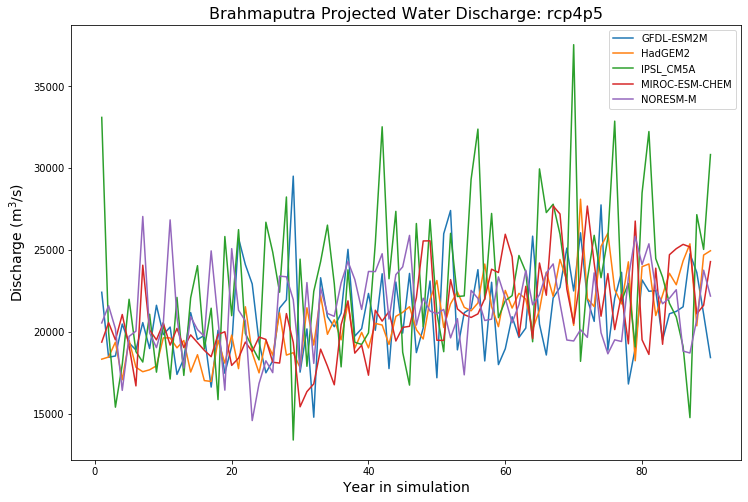

In [10]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qw_mean_rows, color = 'tab:orange', label = 'HadGEM2')
plt.plot(years, ipsl_qw_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
plt.plot(years, miroc_qw_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qw_mean_rows, color = 'tab:purple', label = 'NORESM-M')
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qw_rcp4p5_notrend_color.png')

In [11]:
# calc the trendline for gfdl
z_gfdl = np.polyfit(years, gfdl_qw_mean_rows, 1)
p_gfdl = np.poly1d(z_gfdl)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_gfdl[0],z_gfdl[1]), '(GFDL-ESM2M)')

# calc the trendline for hadgem
z_hadgem = np.polyfit(years, hadgem_qw_mean_rows, 1)
p_hadgem = np.poly1d(z_hadgem)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_hadgem[0],z_hadgem[1]), '(HadGEM2)')

# calc the trendline for ipsl
z_ipsl = np.polyfit(years, ipsl_qw_mean_rows, 1)
p_ipsl = np.poly1d(z_ipsl)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_ipsl[0],z_ipsl[1]), '(IPSL_CM5A)')

# calc the trendline for miroc
z_miroc = np.polyfit(years, miroc_qw_mean_rows, 1)
p_miroc = np.poly1d(z_miroc)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_miroc[0],z_miroc[1]), '(MIROC-ESM-CHEM)')

# calc the trendline for noresm
z_noresm = np.polyfit(years, noresm_qw_mean_rows, 1)
p_noresm = np.poly1d(z_noresm)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_noresm[0],z_noresm[1]), '(NORESM-M)')

y=26.212975x+(19842.596247) (GFDL-ESM2M)
y=69.388745x+(17681.306006) (HadGEM2)
y=58.050392x+(20382.630988) (IPSL_CM5A)
y=57.841121x+(18384.597789) (MIROC-ESM-CHEM)
y=15.600518x+(20669.465371) (NORESM-M)


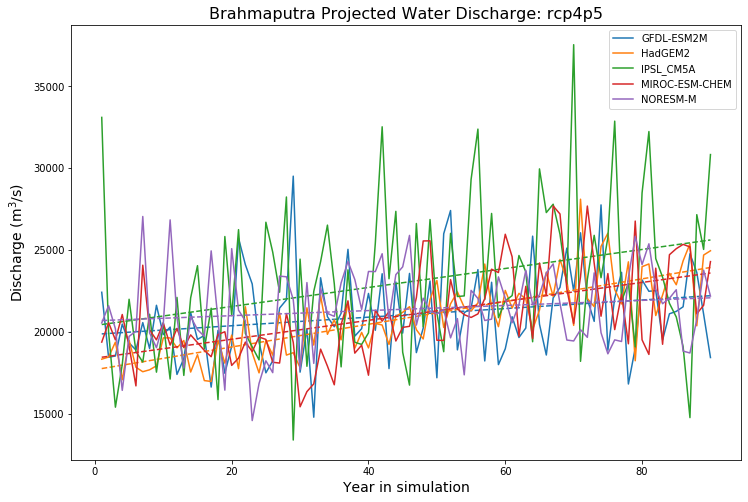

In [12]:
fig, axs = plt.subplots(figsize = (12, 8))

plt.plot(years, gfdl_qw_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'tab:blue', linestyle = 'dashed')

plt.plot(years, hadgem_qw_mean_rows, color = 'tab:orange', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'tab:orange', linestyle = 'dashed' )

plt.plot(years, ipsl_qw_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'tab:green', linestyle = 'dashed')

plt.plot(years, miroc_qw_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'tab:red', linestyle = 'dashed')

plt.plot(years, noresm_qw_mean_rows, color = 'tab:purple', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'tab:purple', linestyle = 'dashed')

plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qw_rcp4p5_trend_color.png')

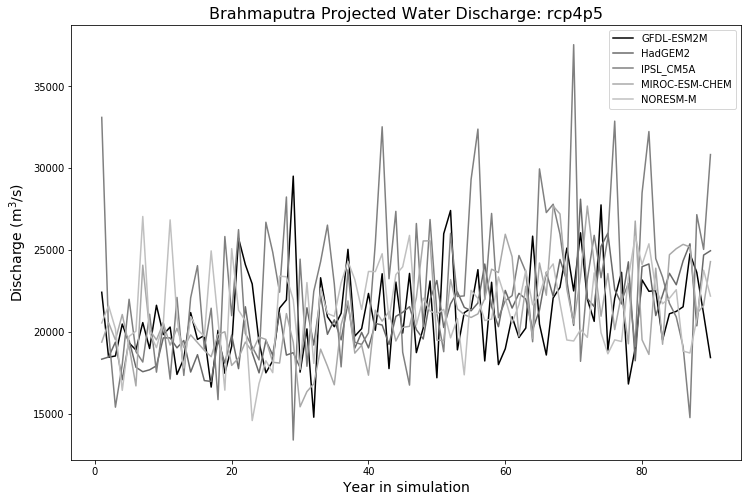

In [13]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'black', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qw_mean_rows, color = 'dimgray', label = 'HadGEM2')
plt.plot(years, ipsl_qw_mean_rows, color = 'gray', label = 'IPSL_CM5A')
plt.plot(years, miroc_qw_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qw_mean_rows, color = 'silver', label = 'NORESM-M')
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qw_rcp4p5_notrend_bw.png')

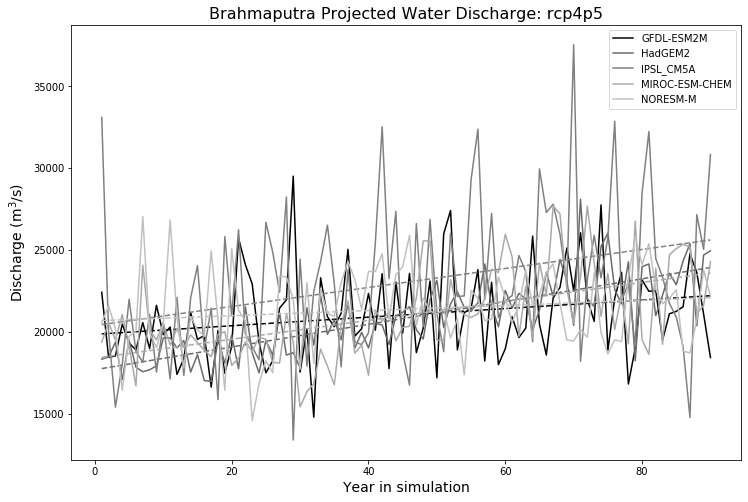

In [14]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qw_mean_rows, color = 'black', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'black', linestyle = 'dashed')

plt.plot(years, hadgem_qw_mean_rows, color = 'dimgray', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'dimgray', linestyle = 'dashed' )

plt.plot(years, ipsl_qw_mean_rows, color = 'gray', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'gray', linestyle = 'dashed')

plt.plot(years, miroc_qw_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'darkgray', linestyle = 'dashed')

plt.plot(years, noresm_qw_mean_rows, color = 'silver', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'silver', linestyle = 'dashed')

plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Discharge (m$^3/$s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qw_rcp4p5_trend_bw.png')

## Reshape: Qs

In [15]:
gfdl_qs = np.array(gfdl['Qs(kg/s)'])
gfdl_qs_reshape = gfdl_qs.reshape(90,365)
gfdl_qs_mean_rows = np.mean(gfdl_qs_reshape, axis = 1)

hadgem_qs = np.array(hadgem['Qs(kg/s)'])
hadgem_qs_reshape = hadgem_qs.reshape(90,365)
hadgem_qs_mean_rows = np.mean(hadgem_qs_reshape, axis = 1)

ipsl_qs = np.array(ipsl['Qs(kg/s)'])
ipsl_qs_reshape = ipsl_qs.reshape(90,365)
ipsl_qs_mean_rows = np.mean(ipsl_qs_reshape, axis = 1)

miroc_qs = np.array(miroc['Qs(kg/s)'])
miroc_qs_reshape = miroc_qs.reshape(90,365)
miroc_qs_mean_rows = np.mean(miroc_qs_reshape, axis = 1)

noresm_qs = np.array(noresm['Qs(kg/s)'])
noresm_qs_reshape = noresm_qs.reshape(90,365)
noresm_qs_mean_rows = np.mean(noresm_qs_reshape, axis = 1)

## Plot

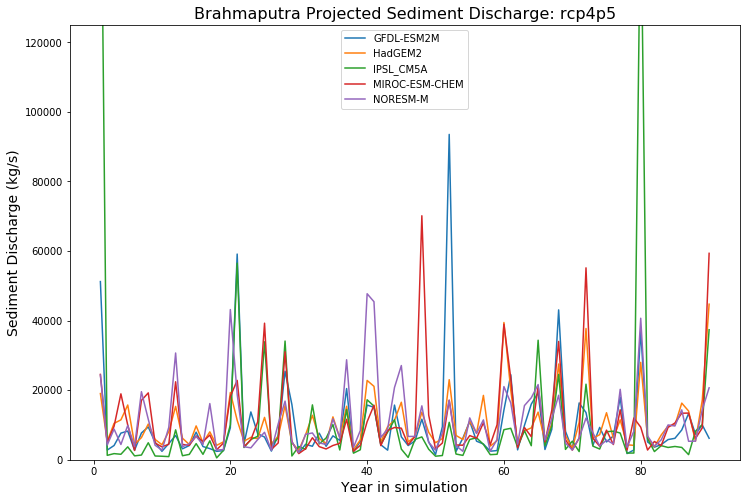

In [17]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qs_mean_rows, color = 'tab:orange', label = 'HadGEM2')
plt.plot(years, ipsl_qs_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
plt.plot(years, miroc_qs_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qs_mean_rows, color = 'tab:purple', label = 'NORESM-M')
plt.ylim(0, 1.25e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Sediment Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qs_rcp4p5_notrend_color.png')

In [18]:
# calc the trendline for gfdl
z_gfdl = np.polyfit(years, gfdl_qs_mean_rows, 1)
p_gfdl = np.poly1d(z_gfdl)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_gfdl[0],z_gfdl[1]), '(GFDL-ESM2M)')

# calc the trendline for hadgem
z_hadgem = np.polyfit(years, hadgem_qs_mean_rows, 1)
p_hadgem = np.poly1d(z_hadgem)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_hadgem[0],z_hadgem[1]), '(HadGEM2)')

# calc the trendline for ipsl
z_ipsl = np.polyfit(years, ipsl_qs_mean_rows, 1)
p_ipsl = np.poly1d(z_ipsl)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_ipsl[0],z_ipsl[1]), '(IPSL_CM5A)')

# calc the trendline for miroc
z_miroc = np.polyfit(years, miroc_qs_mean_rows, 1)
p_miroc = np.poly1d(z_miroc)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_miroc[0],z_miroc[1]), '(MIROC-ESM-CHEM)')

# calc the trendline for noresm
z_noresm = np.polyfit(years, noresm_qs_mean_rows, 1)
p_noresm = np.poly1d(z_noresm)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_noresm[0],z_noresm[1]), '(NORESM-M)')

y=13.622877x+(9588.096428) (GFDL-ESM2M)
y=67.853084x+(7520.927985) (HadGEM2)
y=-20.284497x+(11977.986775) (IPSL_CM5A)
y=45.524863x+(9182.854531) (MIROC-ESM-CHEM)
y=6.518390x+(10728.326405) (NORESM-M)


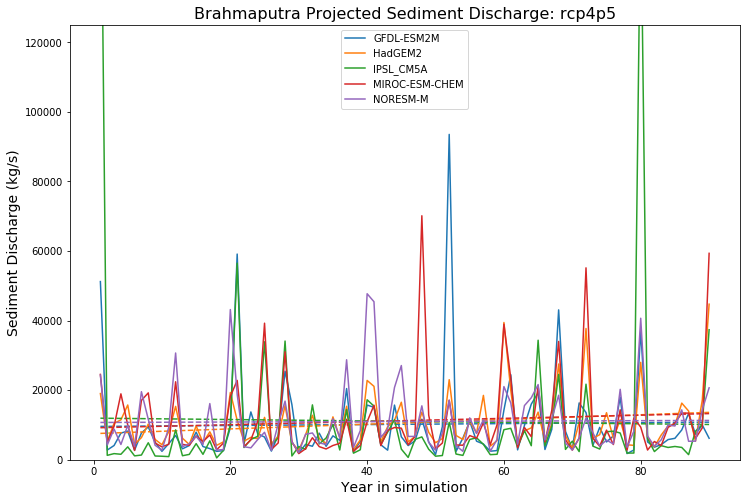

In [19]:
fig, axs = plt.subplots(figsize = (12, 8))

plt.plot(years, gfdl_qs_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'tab:blue', linestyle = 'dashed')

plt.plot(years, hadgem_qs_mean_rows, color = 'tab:orange', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'tab:orange', linestyle = 'dashed' )

plt.plot(years, ipsl_qs_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'tab:green', linestyle = 'dashed')

plt.plot(years, miroc_qs_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'tab:red', linestyle = 'dashed')

plt.plot(years, noresm_qs_mean_rows, color = 'tab:purple', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'tab:purple', linestyle = 'dashed')

plt.ylim(0, 1.25e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Sediment Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qs_rcp4p5_trend_color.png')

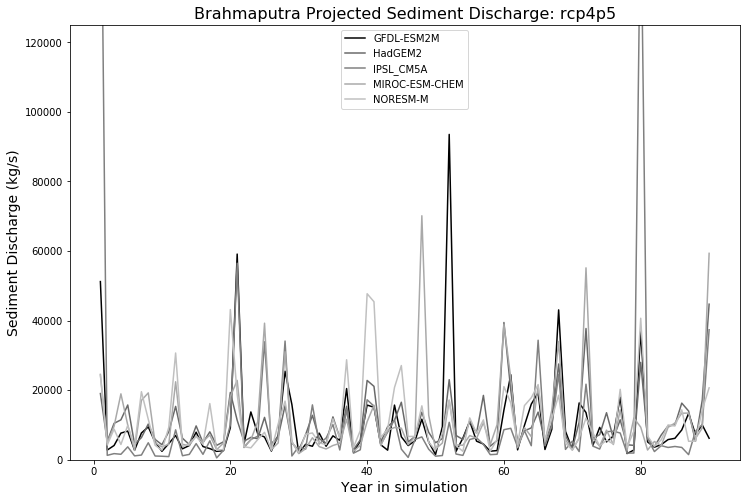

In [20]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'black', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qs_mean_rows, color = 'dimgray', label = 'HadGEM2')
plt.plot(years, ipsl_qs_mean_rows, color = 'gray', label = 'IPSL_CM5A')
plt.plot(years, miroc_qs_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qs_mean_rows, color = 'silver', label = 'NORESM-M')
plt.ylim(0, 1.25e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Sediment Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qs_rcp4p5_notrend_bw.png')

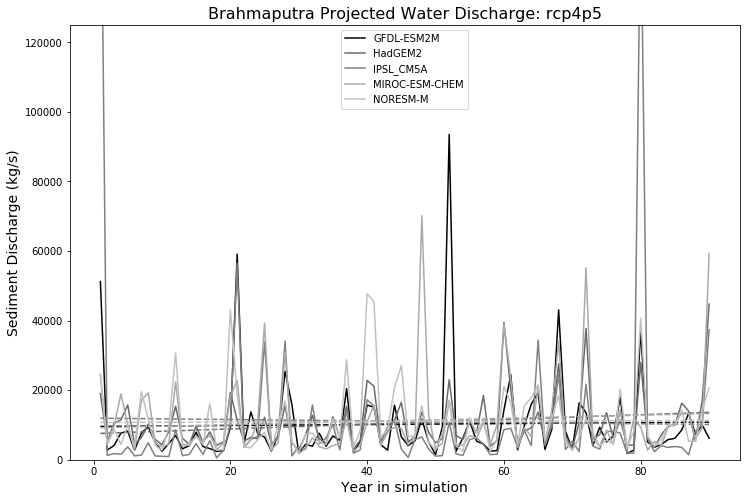

In [21]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'black', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'black', linestyle = 'dashed')

plt.plot(years, hadgem_qs_mean_rows, color = 'dimgray', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'dimgray', linestyle = 'dashed' )

plt.plot(years, ipsl_qs_mean_rows, color = 'gray', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'gray', linestyle = 'dashed')

plt.plot(years, miroc_qs_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'darkgray', linestyle = 'dashed')

plt.plot(years, noresm_qs_mean_rows, color = 'silver', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'silver', linestyle = 'dashed')

plt.ylim(0, 1.25e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qs_rcp4p5_trend_bw.png')

## Reshape: Qs

In [22]:
gfdl_qs = np.array(gfdl['Qs(kg/s)'])
gfdl_qs_reshape = gfdl_qs.reshape(90,365)
gfdl_qs_mean_rows = np.mean(gfdl_qs_reshape, axis = 1)

hadgem_qs = np.array(hadgem['Qs(kg/s)'])
hadgem_qs_reshape = hadgem_qs.reshape(90,365)
hadgem_qs_mean_rows = np.mean(hadgem_qs_reshape, axis = 1)

ipsl_qs = np.array(ipsl['Qs(kg/s)'])
ipsl_qs_reshape = ipsl_qs.reshape(90,365)
ipsl_qs_mean_rows = np.mean(ipsl_qs_reshape, axis = 1)

miroc_qs = np.array(miroc['Qs(kg/s)'])
miroc_qs_reshape = miroc_qs.reshape(90,365)
miroc_qs_mean_rows = np.mean(miroc_qs_reshape, axis = 1)

noresm_qs = np.array(noresm['Qs(kg/s)'])
noresm_qs_reshape = noresm_qs.reshape(90,365)
noresm_qs_mean_rows = np.mean(noresm_qs_reshape, axis = 1)

## Plot

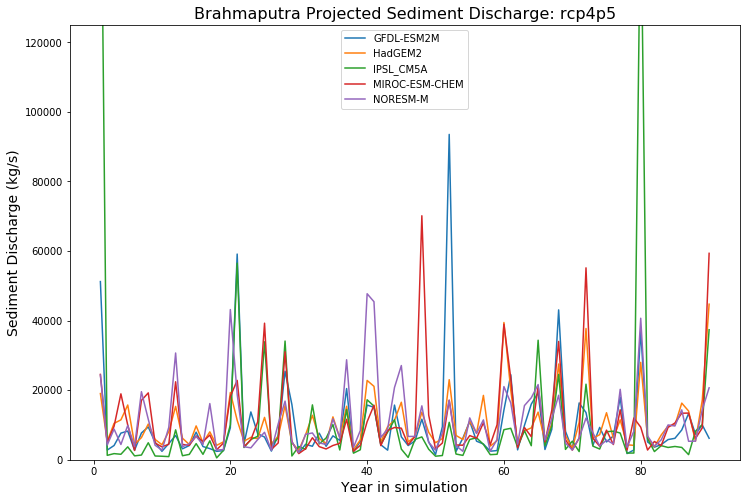

In [23]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qs_mean_rows, color = 'tab:orange', label = 'HadGEM2')
plt.plot(years, ipsl_qs_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
plt.plot(years, miroc_qs_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qs_mean_rows, color = 'tab:purple', label = 'NORESM-M')
plt.ylim(0, 1.25e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Sediment Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qs_rcp4p5_notrend_color.png')

In [24]:
# calc the trendline for gfdl
z_gfdl = np.polyfit(years, gfdl_qs_mean_rows, 1)
p_gfdl = np.poly1d(z_gfdl)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_gfdl[0],z_gfdl[1]), '(GFDL-ESM2M)')

# calc the trendline for hadgem
z_hadgem = np.polyfit(years, hadgem_qs_mean_rows, 1)
p_hadgem = np.poly1d(z_hadgem)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_hadgem[0],z_hadgem[1]), '(HadGEM2)')

# calc the trendline for ipsl
z_ipsl = np.polyfit(years, ipsl_qs_mean_rows, 1)
p_ipsl = np.poly1d(z_ipsl)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_ipsl[0],z_ipsl[1]), '(IPSL_CM5A)')

# calc the trendline for miroc
z_miroc = np.polyfit(years, miroc_qs_mean_rows, 1)
p_miroc = np.poly1d(z_miroc)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_miroc[0],z_miroc[1]), '(MIROC-ESM-CHEM)')

# calc the trendline for noresm
z_noresm = np.polyfit(years, noresm_qs_mean_rows, 1)
p_noresm = np.poly1d(z_noresm)
# the line equation:
print("y=%.6fx+(%.6f)"%(z_noresm[0],z_noresm[1]), '(NORESM-M)')

y=13.622877x+(9588.096428) (GFDL-ESM2M)
y=67.853084x+(7520.927985) (HadGEM2)
y=-20.284497x+(11977.986775) (IPSL_CM5A)
y=45.524863x+(9182.854531) (MIROC-ESM-CHEM)
y=6.518390x+(10728.326405) (NORESM-M)


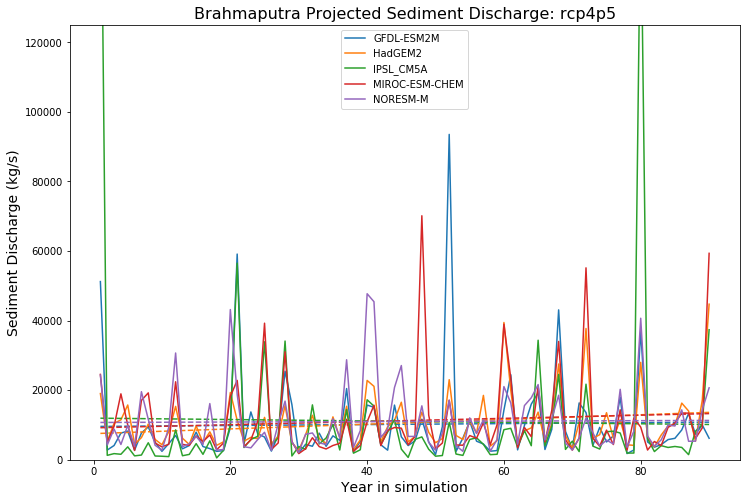

In [25]:
fig, axs = plt.subplots(figsize = (12, 8))

plt.plot(years, gfdl_qs_mean_rows, color = 'tab:blue', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'tab:blue', linestyle = 'dashed')

plt.plot(years, hadgem_qs_mean_rows, color = 'tab:orange', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'tab:orange', linestyle = 'dashed' )

plt.plot(years, ipsl_qs_mean_rows, color = 'tab:green', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'tab:green', linestyle = 'dashed')

plt.plot(years, miroc_qs_mean_rows, color = 'tab:red', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'tab:red', linestyle = 'dashed')

plt.plot(years, noresm_qs_mean_rows, color = 'tab:purple', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'tab:purple', linestyle = 'dashed')

plt.ylim(0, 1.25e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Sediment Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qs_rcp4p5_trend_color.png')

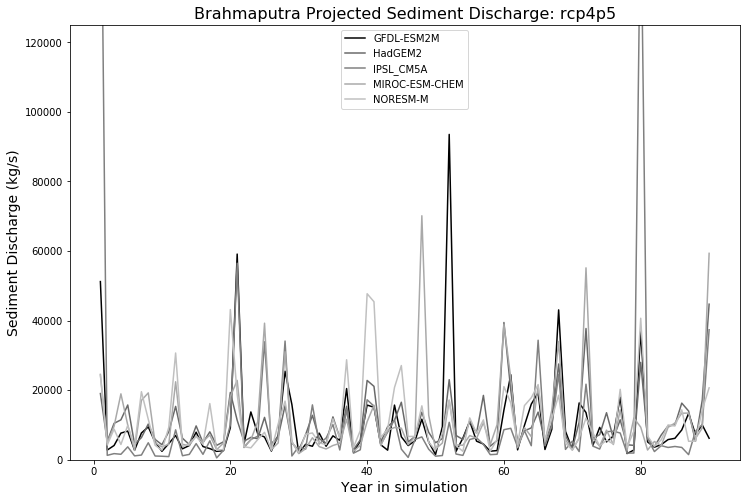

In [26]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'black', label = 'GFDL-ESM2M')
plt.plot(years, hadgem_qs_mean_rows, color = 'dimgray', label = 'HadGEM2')
plt.plot(years, ipsl_qs_mean_rows, color = 'gray', label = 'IPSL_CM5A')
plt.plot(years, miroc_qs_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
plt.plot(years, noresm_qs_mean_rows, color = 'silver', label = 'NORESM-M')
plt.ylim(0, 1.25e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Sediment Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qs_rcp4p5_notrend_bw.png')

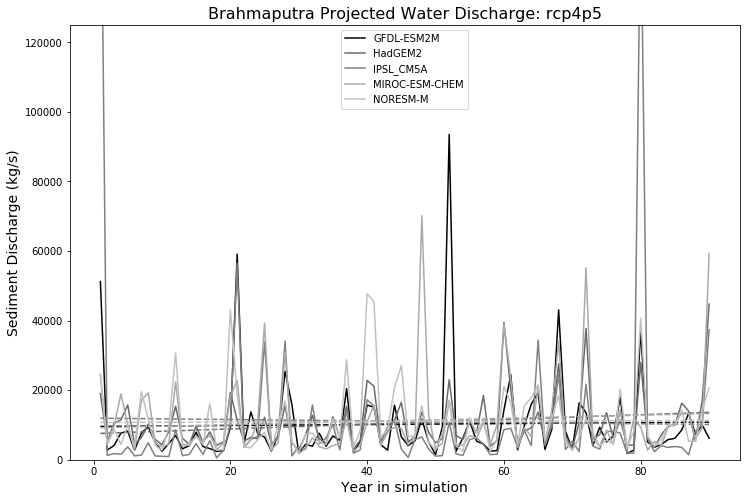

In [27]:
years = np.arange(1, 91, 1)

fig, axs = plt.subplots(figsize = (12, 8))
plt.plot(years, gfdl_qs_mean_rows, color = 'black', label = 'GFDL-ESM2M')
pylab.plot(years,p_gfdl(years), color = 'black', linestyle = 'dashed')

plt.plot(years, hadgem_qs_mean_rows, color = 'dimgray', label = 'HadGEM2')
pylab.plot(years,p_hadgem(years), color = 'dimgray', linestyle = 'dashed' )

plt.plot(years, ipsl_qs_mean_rows, color = 'gray', label = 'IPSL_CM5A')
pylab.plot(years,p_ipsl(years), color = 'gray', linestyle = 'dashed')

plt.plot(years, miroc_qs_mean_rows, color = 'darkgray', label = 'MIROC-ESM-CHEM')
pylab.plot(years,p_miroc(years), color = 'darkgray', linestyle = 'dashed')

plt.plot(years, noresm_qs_mean_rows, color = 'silver', label = 'NORESM-M')
pylab.plot(years,p_noresm(years), color = 'silver', linestyle = 'dashed')

plt.ylim(0, 1.25e5)
plt.xlabel('Year in simulation', size = 14)
plt.ylabel('Sediment Discharge (kg/s)', size = 14)
plt.title('Brahmaputra Projected Water Discharge: rcp4p5', size = 16)
plt.legend()
plt.show()

fig.savefig('/Users/aeckland/hydrotrend_gbmd/figures/v1/projections/brahmaputra_qs_rcp4p5_trend_bw.png')

# Part 2: Calculate average water and sediment discharge and annual sediment discharge for each time period

## Import Summary Statistics

### GFDL-ESM2M

In [28]:
gfdl_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/reference/GFDL-ESM2M/summ_stats_v3.csv'))
gfdl_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/GFDL-ESM2M/2020/summ_stats_v3.csv'))
gfdl_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/GFDL-ESM2M/2040/summ_stats_v3.csv'))
gfdl_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/GFDL-ESM2M/2060/summ_stats_v3.csv'))
gfdl_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/GFDL-ESM2M/2080/summ_stats_v3.csv'))

frames_gfdl = [gfdl_2000, gfdl_2020, gfdl_2040, gfdl_2060, gfdl_2080]
concat_gfdl = pd.concat(frames_gfdl)
concat_gfdl.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])
concat_gfdl

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,18916.085340,7501.209412,0.164265,878.521081,115378.905013,4.125890e+05,5.536896,5358.550596,18834.751563,...,8248.909093,213.675588,0.028749,383.104665,44782.220609,21090.449759,0.470482,2079.823820,200,202
0,2020,20164.030217,9243.469340,0.152190,936.479473,154794.809184,1.372710e+06,12.261987,7189.146205,20708.358082,...,8401.541663,133.546842,0.019242,390.193390,49406.925859,17320.396324,0.362582,2294.609331,205,212
0,2040,21088.101160,9942.710732,0.169280,979.396165,156388.563346,1.539018e+06,14.215071,7263.165041,22202.913535,...,8329.755915,159.401557,0.022177,386.859440,52637.787166,22964.339497,0.440612,2444.660450,200,212
0,2060,21373.959302,10438.236510,0.150468,992.672294,173761.425652,3.578372e+06,20.593590,8070.014107,22969.724855,...,8792.940148,141.924469,0.018538,408.371137,53903.376959,18309.577611,0.348651,2503.438325,203,203
0,2080,21807.216244,10802.560398,0.173554,1012.794077,151948.635819,1.271415e+06,10.741785,7056.961175,23226.998614,...,8768.635693,178.802574,0.023416,407.242364,54328.769566,23638.669845,0.444188,2523.194864,210,201


In [29]:
gfdl_change = ((gfdl_2080 - gfdl_2000)/gfdl_2000)*100
concat_gfdl = concat_gfdl.append(gfdl_change)

concat_gfdl.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,18916.08534,7501.20941,0.16427,878.52108,115378.90501,4.125890e+05,5.53690,5358.55060,18834.75156,...,8248.90909,213.67559,0.02875,383.10466,44782.22061,21090.44976,0.47048,2079.82382,200.0,202.00000
0,2020,20164.03022,9243.46934,0.15219,936.47947,154794.80918,1.372710e+06,12.26199,7189.14620,20708.35808,...,8401.54166,133.54684,0.01924,390.19339,49406.92586,17320.39632,0.36258,2294.60933,205.0,212.00000
0,2040,21088.10116,9942.71073,0.16928,979.39616,156388.56335,1.539018e+06,14.21507,7263.16504,22202.91354,...,8329.75592,159.40156,0.02218,386.85944,52637.78717,22964.33950,0.44061,2444.66045,200.0,212.00000
0,2060,21373.95930,10438.23651,0.15047,992.67229,173761.42565,3.578372e+06,20.59359,8070.01411,22969.72485,...,8792.94015,141.92447,0.01854,408.37114,53903.37696,18309.57761,0.34865,2503.43833,203.0,203.00000
0,2080,21807.21624,10802.56040,0.17355,1012.79408,151948.63582,1.271415e+06,10.74178,7056.96118,23226.99861,...,8768.63569,178.80257,0.02342,407.24236,54328.76957,23638.66984,0.44419,2523.19486,210.0,201.00000
0,NaN,15.28398,44.01092,5.65488,15.28398,31.69534,2.081552e+02,94.00374,31.69534,23.31991,...,6.30055,-16.32054,-18.54856,6.30055,21.31772,12.08234,-5.58875,21.31772,5.0,-0.49505


### HadGEM2

In [30]:
hadgem_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/reference/HadGEM2/summ_stats_v3.csv'))
hadgem_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/HadGEM2/2020/summ_stats_v3.csv'))
hadgem_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/HadGEM2/2040/summ_stats_v3.csv'))
hadgem_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/HadGEM2/2060/summ_stats_v3.csv'))
hadgem_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/HadGEM2/2080/summ_stats_v3.csv'))

frames_hadgem = [hadgem_2000, hadgem_2020, hadgem_2040, hadgem_2060, hadgem_2080]
concat_hadgem = pd.concat(frames_hadgem)
concat_hadgem.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [31]:
hadgem_change = ((hadgem_2080 - hadgem_2000)/hadgem_2000)*100
concat_hadgem = concat_hadgem.append(hadgem_change)

concat_hadgem.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,18172.09489,7795.40913,0.18060,843.96788,86025.36822,718983.27423,10.28234,3995.28222,17373.41009,...,7976.81873,191.62658,0.02803,370.46795,44778.40846,22040.93112,0.50055,2079.64677,192.00000,184.00000
0,2020,18521.02694,8779.34014,0.20440,860.17336,87601.45078,317809.08054,4.14073,4068.48034,17753.10024,...,8140.24274,213.31981,0.03284,378.05787,45787.13834,25723.74611,0.57519,2126.49528,187.00000,188.00000
0,2040,19927.77705,9454.74017,0.19931,925.50715,89068.50844,695698.99567,9.27680,4136.61500,18944.43738,...,8800.97095,245.04070,0.03359,408.74411,48861.63826,24667.69562,0.52123,2269.28450,190.00000,196.00000
0,2060,21477.29092,11302.98449,0.22295,997.47133,89485.30514,697490.17488,8.81932,4155.97232,20444.27028,...,10757.57012,383.51963,0.04056,499.61459,52967.97728,28217.09255,0.56596,2459.99549,193.00000,200.00000
0,2080,22937.63352,12454.62232,0.22502,1065.29413,101267.93456,854870.34392,8.44167,4703.19380,21914.66963,...,12451.57243,476.49943,0.04234,578.28925,55234.61516,30842.68825,0.57917,2565.26511,190.00000,192.00000
0,NaN,26.22449,59.76868,24.59941,26.22449,17.71869,18.89989,-17.90126,17.71869,26.13914,...,56.09697,148.66041,51.03429,56.09697,23.35100,39.93369,15.70701,23.35100,-1.04167,4.34783


### IPSL_CM5A

In [32]:
ipsl_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/reference/IPSL_CM5A/summ_stats_v3.csv'))
ipsl_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/IPSL_CM5A/2020/summ_stats_v3.csv'))
ipsl_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/IPSL_CM5A/2040/summ_stats_v3.csv'))
ipsl_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/IPSL_CM5A/2060/summ_stats_v3.csv'))
ipsl_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/IPSL_CM5A/2080/summ_stats_v3.csv'))

frames_ipsl = [ipsl_2000, ipsl_2020, ipsl_2040, ipsl_2060, ipsl_2080]
concat_ipsl = pd.concat(frames_ipsl)
concat_ipsl.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [33]:
ipsl_change = ((ipsl_2080 - ipsl_2000)/ipsl_2000)*100
concat_ipsl = concat_ipsl.append(ipsl_change)

concat_ipsl.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,18990.21125,8159.19742,0.14099,881.96372,147818.91816,1.150347e+06,11.74958,6865.16441,20104.31415,...,8130.55402,127.83395,0.01819,377.60789,49175.15698,16154.57759,0.33955,2283.84527,214.00000,213.00000
0,2020,21037.51800,9924.69328,0.09274,977.04693,229622.28216,6.609650e+06,28.78488,10664.36379,23435.57824,...,8548.56250,55.19575,0.00739,397.02149,56040.93570,7906.74571,0.14854,2602.71312,214.00000,177.00000
0,2040,22415.62951,11379.16103,0.17005,1041.05066,145658.01708,9.187398e+05,8.47269,6764.80553,24801.61420,...,9372.78954,163.99832,0.02101,435.30112,60597.81891,24349.36824,0.39449,2814.34876,214.00000,212.00000
0,2060,24761.81188,13143.65228,0.11360,1150.01457,226070.82715,5.932338e+06,27.86165,10499.42332,27919.15835,...,10319.04803,85.10625,0.01020,479.24827,63630.33485,11284.22349,0.18522,2955.18811,213.00000,170.00000
0,2080,24748.51151,13638.15474,0.15491,1149.39686,226043.19853,6.721704e+06,37.43468,10498.14016,27829.56645,...,10401.54029,159.86173,0.01802,483.07947,62159.94408,18055.82160,0.29395,2886.89865,215.00000,187.00000
0,NaN,30.32247,67.15069,9.87136,30.32247,52.91899,4.843199e+02,218.60439,52.91899,38.42584,...,27.93151,25.05421,-0.90656,27.93151,26.40518,11.76907,-13.42943,26.40518,0.46729,-12.20657


### MIROC-ESM-CHEM

In [34]:
miroc_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/reference/MIROC-ESM-CHEM/summ_stats_v3.csv'))
miroc_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2020/summ_stats_v3.csv'))
miroc_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2040/summ_stats_v3.csv'))
miroc_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2060/summ_stats_v3.csv'))
miroc_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/MIROC-ESM-CHEM/2080/summ_stats_v3.csv'))

frames_miroc = [miroc_2000, miroc_2020, miroc_2040, miroc_2060, miroc_2080]
concat_miroc = pd.concat(frames_miroc)
concat_miroc.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [35]:
miroc_change = ((miroc_2080 - miroc_2000)/miroc_2000)*100
concat_miroc = concat_miroc.append(miroc_change)

concat_miroc.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,19284.00858,8291.34981,0.18562,895.60857,118057.43050,3.509053e+05,5.22602,5482.94954,18427.91174,...,9490.61523,308.39066,0.03542,440.77331,46582.20808,24000.54756,0.51744,2163.42076,206.00000,203.00000
0,2020,19377.51087,9167.35948,0.17795,899.95110,120691.95699,5.418340e+05,7.85139,5605.30504,19112.13929,...,9872.91443,280.23427,0.03089,458.52846,47699.17418,20380.24712,0.43793,2215.29610,208.00000,203.00000
0,2040,19406.54338,9975.21527,0.18059,901.29946,125630.16825,1.043758e+06,8.64858,5834.65074,18680.78422,...,10427.52466,308.51251,0.03280,484.28626,44989.89880,17892.45600,0.40675,2089.46903,202.00000,201.00000
0,2060,22268.61501,11885.09439,0.21331,1034.22285,129794.25978,1.922358e+06,14.81081,6028.04393,21041.33516,...,13003.74658,581.95065,0.04776,603.93392,52461.00318,27321.38951,0.54251,2436.45006,200.00000,226.00000
0,2080,22925.74666,12747.59016,0.21645,1064.74206,138994.62600,1.894700e+06,16.77703,6455.33719,21822.04210,...,13218.99980,561.56695,0.04543,613.93094,53843.36527,26719.75208,0.51487,2500.65120,199.00000,201.00000
0,NaN,18.88476,53.74566,16.61197,18.88476,17.73475,4.399462e+02,221.02900,17.73475,18.41842,...,39.28496,82.09597,28.26281,39.28496,15.58783,11.32976,-0.49715,15.58783,-3.39806,-0.98522


### NORESM-M

In [36]:
noresm_2000 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/reference/NORESM-M/summ_stats_v3.csv'))
noresm_2020 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/NORESM-M/2020/summ_stats_v3.csv'))
noresm_2040 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/NORESM-M/2040/summ_stats_v3.csv'))
noresm_2060 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/NORESM-M/2060/summ_stats_v3.csv'))
noresm_2080 = pd.DataFrame(pd.read_csv('/Users/aeckland/hydrotrend_gbmd/setup/run_1/Brahmaputra/rcp4p5/NORESM-M/2080/summ_stats_v3.csv'))

frames_noresm = [noresm_2000, noresm_2020, noresm_2040, noresm_2060, noresm_2080]
concat_noresm = pd.concat(frames_noresm)
concat_noresm.insert(0, 'Time Frame', ['2000', '2020', '2040', '2060', '2080'])

In [37]:
noresm_change = ((noresm_2080 - noresm_2000)/noresm_2000)*100
concat_noresm = concat_noresm.append(noresm_change)

concat_noresm.round(5)

,Time Frame,Mean Qw,Mean Qs,Mean SSC,Mean Qb,Max Qw,Max Qs,Max SSC,Max Qb,SD Qw,...,Qw 50 %ile,Qs 50 %ile,SSC 50 %ile,QB 50 %ile,Qw 90 %ile,Qs 90 %ile,SSC 90 %ile,QB 90 %ile,DOY Peak Qw,DOY Peak Qs
0,2000,18946.89809,8061.00978,0.16801,879.95212,78606.70947,5.626772e+05,7.43967,3650.73693,18611.27799,...,8722.49463,209.37628,0.02695,405.09943,48911.84959,21466.46470,0.45524,2271.61647,190.0,201.00000
0,2020,20405.54396,9356.31629,0.17175,947.69611,139949.51264,6.593258e+05,8.27614,6499.68505,20345.78150,...,9497.01012,209.04848,0.02479,441.07031,50679.77393,20509.07562,0.42359,2353.72430,191.0,192.00000
0,2040,21435.89331,10387.88810,0.17866,995.54870,135264.31133,9.253157e+05,10.65663,6282.08992,22135.14498,...,9483.94289,222.40662,0.02722,440.46343,54195.01647,24141.83698,0.44811,2516.98296,195.0,196.00000
0,2060,21882.06070,10833.87798,0.18300,1016.27008,119271.37219,1.179300e+06,11.43208,5539.32872,22155.74204,...,10875.86062,278.40850,0.02965,505.10836,53091.69660,24374.16460,0.46005,2465.74140,191.0,193.00000
0,2080,21696.17333,10965.86946,0.19565,1007.63690,122206.33652,6.852205e+05,7.80430,5675.63748,21570.06856,...,10079.63556,286.37186,0.03152,468.12922,54467.16965,26051.30127,0.49095,2529.62259,190.0,188.00000
0,NaN,14.51042,36.03593,16.45207,14.51042,55.46553,2.177862e+01,4.90121,55.46553,15.89784,...,15.55909,36.77378,16.93468,15.55909,11.35782,21.35814,7.84396,11.35782,0.0,-6.46766


### Average Water Discharge

In [38]:
avg_qw_ref = (gfdl_2000['Mean Qw']+hadgem_2000['Mean Qw']+ipsl_2000['Mean Qw']+miroc_2000['Mean Qw']+noresm_2000['Mean Qw'])/5
avg_qw_2020 = (gfdl_2020['Mean Qw']+hadgem_2020['Mean Qw']+ipsl_2020['Mean Qw']+miroc_2020['Mean Qw']+noresm_2020['Mean Qw'])/5
avg_qw_2040 = (gfdl_2040['Mean Qw']+hadgem_2040['Mean Qw']+ipsl_2040['Mean Qw']+miroc_2040['Mean Qw']+noresm_2040['Mean Qw'])/5
avg_qw_2060 = (gfdl_2060['Mean Qw']+hadgem_2060['Mean Qw']+ipsl_2060['Mean Qw']+miroc_2060['Mean Qw']+noresm_2060['Mean Qw'])/5
avg_qw_2080 = (gfdl_2080['Mean Qw']+hadgem_2080['Mean Qw']+ipsl_2080['Mean Qw']+miroc_2080['Mean Qw']+noresm_2080['Mean Qw'])/5

In [39]:
print(np.asarray(avg_qw_ref).round(0), 'm^3/s')
print(np.asarray(avg_qw_2020).round(0), 'm^3/s')
print(np.asarray(avg_qw_2040).round(0), 'm^3/s')
print(np.asarray(avg_qw_2060).round(0), 'm^3/s')
print(np.asarray(avg_qw_2080).round(0), 'm^3/s')

[18862.] m^3/s
[19901.] m^3/s
[20855.] m^3/s
[22353.] m^3/s
[22823.] m^3/s


### Average Sediment Discharge

In [40]:
avg_qs_ref = (gfdl_2000['Mean Qs']+hadgem_2000['Mean Qs']+ipsl_2000['Mean Qs']+miroc_2000['Mean Qs']+noresm_2000['Mean Qs'])/5
avg_qs_2020 = (gfdl_2020['Mean Qs']+hadgem_2020['Mean Qs']+ipsl_2020['Mean Qs']+miroc_2020['Mean Qs']+noresm_2020['Mean Qs'])/5
avg_qs_2040 = (gfdl_2040['Mean Qs']+hadgem_2040['Mean Qs']+ipsl_2040['Mean Qs']+miroc_2040['Mean Qs']+noresm_2040['Mean Qs'])/5
avg_qs_2060 = (gfdl_2060['Mean Qs']+hadgem_2060['Mean Qs']+ipsl_2060['Mean Qs']+miroc_2060['Mean Qs']+noresm_2060['Mean Qs'])/5
avg_qs_2080 = (gfdl_2080['Mean Qs']+hadgem_2080['Mean Qs']+ipsl_2080['Mean Qs']+miroc_2080['Mean Qs']+noresm_2080['Mean Qs'])/5

In [41]:
print(np.asarray(avg_qs_ref).round(0), 'kg/s')
print(np.asarray(avg_qs_2020).round(0), 'kg/s')
print(np.asarray(avg_qs_2040).round(0), 'kg/s')
print(np.asarray(avg_qs_2060).round(0), 'kg/s')
print(np.asarray(avg_qs_2080).round(0), 'kg/s')

[7962.] kg/s
[9294.] kg/s
[10228.] kg/s
[11521.] kg/s
[12122.] kg/s


### Average SSC

In [42]:
avg_SSC_ref = (gfdl_2000['Mean SSC']+hadgem_2000['Mean SSC']+ipsl_2000['Mean SSC']+miroc_2000['Mean SSC']+noresm_2000['Mean SSC'])/5
avg_SSC_2020 = (gfdl_2020['Mean SSC']+hadgem_2020['Mean SSC']+ipsl_2020['Mean SSC']+miroc_2020['Mean SSC']+noresm_2020['Mean SSC'])/5
avg_SSC_2040 = (gfdl_2040['Mean SSC']+hadgem_2040['Mean SSC']+ipsl_2040['Mean SSC']+miroc_2040['Mean SSC']+noresm_2040['Mean SSC'])/5
avg_SSC_2060 = (gfdl_2060['Mean SSC']+hadgem_2060['Mean SSC']+ipsl_2060['Mean SSC']+miroc_2060['Mean SSC']+noresm_2060['Mean SSC'])/5
avg_SSC_2080 = (gfdl_2080['Mean SSC']+hadgem_2080['Mean SSC']+ipsl_2080['Mean SSC']+miroc_2080['Mean SSC']+noresm_2080['Mean SSC'])/5

In [43]:
print(np.asarray(avg_SSC_ref).round(3), 'kg/m3')
print(np.asarray(avg_SSC_2020).round(3), 'kg/m3')
print(np.asarray(avg_SSC_2040).round(3), 'kg/m3')
print(np.asarray(avg_SSC_2060).round(3), 'kg/m3')
print(np.asarray(avg_SSC_2080).round(3), 'kg/m3')

[0.168] kg/m3
[0.16] kg/m3
[0.18] kg/m3
[0.177] kg/m3
[0.193] kg/m3


### Annual Sediment Discharge

In [44]:
print(np.asarray(avg_qs_ref*3.14e7/1e9).round(0), 'MT/yr')
print(np.asarray(avg_qs_2020*3.14e7/1e9).round(0), 'MT/yr')
print(np.asarray(avg_qs_2040*3.14e7/1e9).round(0), 'MT/yr')
print(np.asarray(avg_qs_2060*3.14e7/1e9).round(0), 'MT/yr')
print(np.asarray(avg_qs_2080*3.14e7/1e9).round(0), 'MT/yr')

[250.] MT/yr
[292.] MT/yr
[321.] MT/yr
[362.] MT/yr
[381.] MT/yr


## Part 3: Calculate annual present-day Qs using new rating curve 

In [45]:
# this is one year of discharge data: 2019-2020 
# dataset starts in 2006, so 2019-2006 = 13, 13*365 = 4745, 4745+365 = 5110)

gfdl_qw = gfdl['Qw(m3/s)'][4745:5110]
hadgem_qw = hadgem['Qw(m3/s)'][4745:5110]
ipsl_qw = ipsl['Qw(m3/s)'][4745:5110]
miroc_qw = miroc['Qw(m3/s)'][4745:5110]
noresm_qw = noresm['Qw(m3/s)'][4745:5110]

In [46]:
# print mean water dishcarge for 2019

print('{:.6} cms (GFDL_ESM2M)'.format(gfdl_qw.mean()))
print('{:.6} cms (HadGEM2)'.format(hadgem_qw.mean()))
print('{:.6} cms (IPSL_CM5A)'.format(ipsl_qw.mean()))
print('{:.6} cms (MIROC-ESM-CHEM)'.format(miroc_qw.mean()))
print('{:.6} cms (NORESM-M)'.format(noresm_qw.mean()))

21169.5 cms (GFDL_ESM2M)
17538.4 cms (HadGEM2)
22071.7 cms (IPSL_CM5A)
19808.7 cms (MIROC-ESM-CHEM)
20925.9 cms (NORESM-M)


In [47]:
# this is one year of ssc data in mg/l, using rating curve from IWM data

gfdl_cs_mgl = 0.031985*gfdl_qw**0.927380
hadgem_cs_mgl = 0.031985*hadgem_qw**0.927380
ipsl_cs_mgl = 0.031985*ipsl_qw**0.927380
miroc_cs_mgl = 0.031985*miroc_qw**0.927380
noresm_cs_mgl = 0.031985*noresm_qw**0.927380

In [48]:
# convert ssc from mg/l to kg/m3

gfdl_cs_kgm3 = gfdl_cs_mgl*1e-6/1e-3
hadgem_cs_kgm3 = hadgem_cs_mgl*1e-6/1e-3
ipsl_cs_kgm3 = ipsl_cs_mgl*1e-6/1e-3
miroc_cs_kgm3 = miroc_cs_mgl*1e-6/1e-3
noresm_cs_kgm3 = noresm_cs_mgl*1e-6/1e-3

In [49]:
# this is one year of qs data in kg/day

gfdl_qs = (gfdl_qw * gfdl_cs_kgm3)*60*60*24
hadgem_qs = (hadgem_qw * hadgem_cs_kgm3)*60*60*24
ipsl_qs = (ipsl_qw * ipsl_cs_kgm3)*60*60*24
miroc_qs = (miroc_qw * miroc_cs_kgm3)*60*60*24
noresm_qs = (noresm_qw * noresm_cs_kgm3)*60*60*24

In [50]:
# sum sediment load over a year to obtain kg/year

gfdl_annual_qs_kg = gfdl_qs.sum()
hadgem_annual_qs_kg = hadgem_qs.sum()
ipsl_annual_qs_kg = ipsl_qs.sum()
miroc_annual_qs_kg = miroc_qs.sum()
noresm_annual_qs_kg = noresm_qs.sum()

In [51]:
# convert qs from kg/year to MT/yr

gfdl_annual_qs_mt = gfdl_annual_qs_kg/1e9
hadgem_annual_qs_mt = hadgem_annual_qs_kg/1e9
ipsl_annual_qs_mt = ipsl_annual_qs_kg/1e9
miroc_annual_qs_mt = miroc_annual_qs_kg/1e9
noresm_annual_qs_mt = noresm_annual_qs_kg/1e9

In [52]:
# print annual Qs results

print('{:.4} MT/yr (GFDL_ESM2M)'.format(gfdl_annual_qs_mt))
print('{:.4} MT/yr (HadGEM2)'.format(hadgem_annual_qs_mt))
print('{:.4} MT/yr (IPSL_CM5A)'.format(ipsl_annual_qs_mt))
print('{:.4} MT/yr (MIROC-ESM-CHEM)'.format(miroc_annual_qs_mt))
print('{:.4} MT/yr (NORESM-M)'.format(noresm_annual_qs_mt))

403.1 MT/yr (GFDL_ESM2M)
274.2 MT/yr (HadGEM2)
434.1 MT/yr (IPSL_CM5A)
329.0 MT/yr (MIROC-ESM-CHEM)
410.7 MT/yr (NORESM-M)
